Contents:
In this notebook:

1. K-Means Clustering
2. Questions


In [ ]:
# Mount Google Drive so we can use data from our drive
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)


In [ ]:
 print('Current path is:')
 !pwd
 !ls

In [ ]:
%cd "/content/drive/My Drive/Data"
print('The Data Files are:')
!ls "/content/drive/My Drive/Data/"

# Section: K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Read the data

#datapath = '/content/drive/My Drive/Data/Mall_Customers.csv'
#datapath = '/content/Mall_Customers.csv'
datapath = 'Data/Mall_Customers.csv'
data = pd.read_csv(datapath)

In [3]:
# some info about data
print('The data size is:',data.shape)
data.head()

The data size is: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print('The correlation between features (columns):\n')
data.corr()

The correlation between features (columns):



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
# Lets do K Means Clustering using only Annual Income and Age as Features

df1 = data[['CustomerID', 'Annual Income (k$)', 'Age']]
df1.head()
X = df1[['Annual Income (k$)', 'Age']] # copy of df1 to pass to KMeans without Customer ID as feature

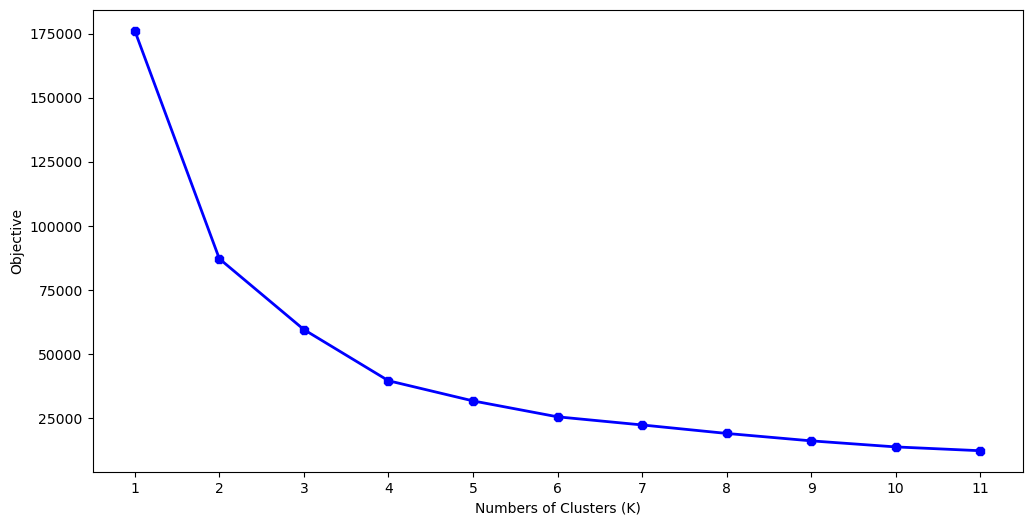

In [8]:
# We will first find objectives (within cluster variance) for different numbers of clusters from k =1 to K. Plot k vs objective.
# Choose Numbers of Clusters for which objective start diminishing.

K = 12
Wcav = []
for k in range(1,K):
  km = KMeans(n_clusters=k)
  km.fit(X)
  Wcav.append(km.inertia_)

# Plot the k vs obj curve (The elbow curve)
plt.figure(figsize=(12,6))
plt.plot(range(1,K), Wcav, linewidth=2, color='blue', marker ='8')
plt.xticks(np.arange(1,K,1))
plt.xlabel("Numbers of Clusters (K)")
plt.ylabel("Objective")
plt.show()

In [36]:
# Lets us 4 different clusters and get customer ID for each cluster
K = 4
km1 = KMeans(n_clusters = K)
km1.fit(X)
# Predict the labels (cluster) for each sample
y = km1.predict(X)
# add cluster number to each sample on our data frame
df1['Cluster Num'] = y

df1.head()

/var/folders/73/pgbldgpn5377pkkhqz32w3x40000gn/T/ipykernel_56222/50647031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster Num'] = y


,CustomerID,Annual Income (k$),Age,Cluster Num
0,1,15,19,1
1,2,15,21,1
2,3,16,20,1
3,4,16,23,1
4,5,17,31,1


/var/folders/73/pgbldgpn5377pkkhqz32w3x40000gn/T/ipykernel_56222/2754743473.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',hue="Cluster Num",


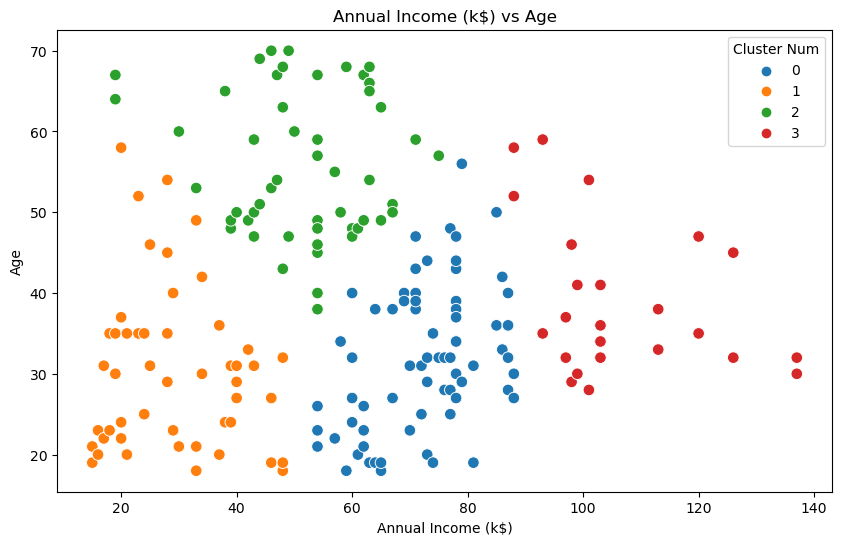

In [41]:
# Lets plot scatter plot of our data with Cluster colors
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',hue="Cluster Num",  
                 palette=sns.color_palette(), legend='full',data = df1  ,s = 70 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age') 
plt.title('Annual Income (k$) vs Age')
plt.show()

In [32]:
# Numbers of Customers and Their IDs in any Cluster
cluster0=df1[df1["Cluster Num"]==0]
print('Number of customers in cluster0 are:',len(cluster0))
print('The customers ID are:\n', cluster0["CustomerID"].values)


Number of customers in cluster0 are: 54
The customers ID are:
 [  9  11  31  33  41  43  45  47  51  54  55  56  57  58  60  61  63  64
  65  67  68  71  72  73  74  75  77  78  80  81  82  83  84  86  87  90
  91  93  97  99 102 103 105 107 108 109 110 111 117 118 119 120 129 141]


# Questions

Questions 
1. Repeat the K Means Clustering above using three features Annual Income, Age, and Income Score
2. Plot the 2 D scatter plot as shown above using Annual Income and Age as axes
3. Plot a 3D scatter plot using Annual Income, Age, and Income Score as axes